# Supervised Learning

You can consult the solution for this live training in `notebook-solution.ipynb`.

## Predicting values of a *target variable* given a set of *features*

* For example, predicting if a customer will buy a product *(target)* based on their location and last five purchases *(features)*.

### Regression

* Predicting the values of a continuous variable e.g., house price.

### Classification

* Predicting a binary outcome e.g., customer churn.

# Data Dictionary

The data has the following fields:

|Column name | Description |
|------------|-------------|
| `loan_id`  | Unique loan id |
| `gender`   | Gender - `Male` / `Female` |
| `married`  | Marital status - `Yes` / `No` |
| `dependents` | Number of dependents |
| `education` | Education - `Graduate` / `Not Graduate` |
| `self_employed` | Self-employment status - `Yes` / `No` |
| `applicant_income` | Applicant's income |
| `coapplicant_income` | Coapplicant's income |
| `loan_amount` | Loan amount (thousands) |
| `loan_amount_term` | Term of loan (months) |
| `credit_history` | Credit history meets guidelines - `1` / `0` |
| `property_area` | Area of the property - `Urban` / `Semi Urban` / `Rural` | 
| `loan_status` | Loan approval status (target) - `1` / `0` |

In [135]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [136]:
# Read in the dataset
df = pd.read_csv("loans.csv")
numeric_df = df.select_dtypes(include=[float, int])
# Preview the data
print(df.head())

    loan_id gender married dependents     education self_employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001011   Male     Yes          2      Graduate           Yes   

   applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
0              4583              1508.0        128.0             360.0   
1              3000                 0.0         66.0             360.0   
2              2583              2358.0        120.0             360.0   
3              6000                 0.0        141.0             360.0   
4              5417              4196.0        267.0             360.0   

   credit_history property_area  loan_status  
0             1.0         Rural            0  
1             1.0         Urban            1  

# Exploratory Data Analysis

We can't just dive straight into machine learning!
We need to understand and format our data for modeling.
What are we looking for?

## Cleanliness

* Are columns set to the correct data type?
* Do we have missing data?

## Distributions

* Many machine learning algorithms expect data that is normally distributed.
* Do we have outliers (extreme values)?

## Relationships

* If data is strongly correlated with the target variable it might be a good feature for predictions!

## Feature Engineering

* Do we need to modify any data, e.g., into different data types (ML models expect numeric data), or extract part of the data?

In [137]:
# Remove the loan_id to avoid accidentally using it as a feature
df = df.drop("loan_id", axis=1)

In [138]:
# Counts and data types per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              553 non-null    object 
 1   married             553 non-null    object 
 2   dependents          553 non-null    object 
 3   education           553 non-null    object 
 4   self_employed       553 non-null    object 
 5   applicant_income    553 non-null    int64  
 6   coapplicant_income  553 non-null    float64
 7   loan_amount         553 non-null    float64
 8   loan_amount_term    553 non-null    float64
 9   credit_history      553 non-null    float64
 10  property_area       553 non-null    object 
 11  loan_status         553 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 52.0+ KB


       applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
count        553.000000          553.000000   553.000000        553.000000   
mean        5350.018083         1659.119204   146.001808        341.663653   
std         5965.429068         3043.448229    84.052035         65.555451   
min          150.000000            0.000000     9.000000         12.000000   
25%         2889.000000            0.000000   100.000000        360.000000   
50%         3812.000000         1213.000000   128.000000        360.000000   
75%         5815.000000         2306.000000   170.000000        360.000000   
max        81000.000000        41667.000000   650.000000        480.000000   

       credit_history  loan_status  
count      553.000000   553.000000  
mean         0.871609     0.703436  
std          0.334827     0.457156  
min          0.000000     0.000000  
25%          1.000000     0.000000  
50%          1.000000     1.000000  
75%          1.000000     1.000000  
m

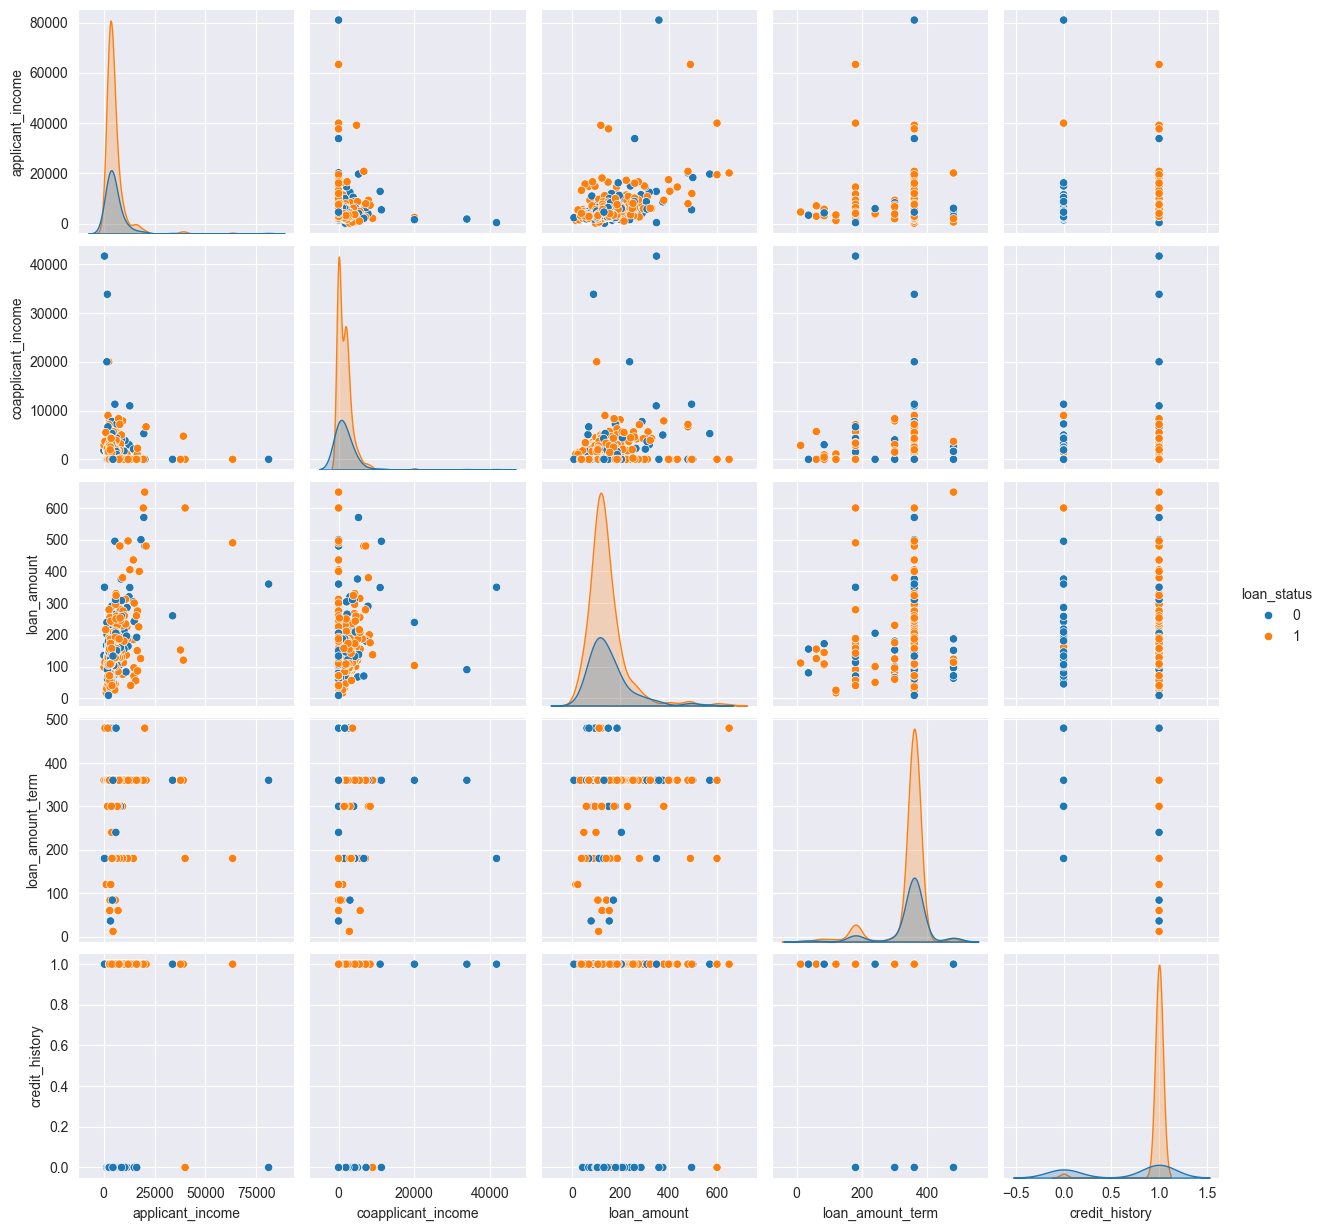

In [139]:
# Distributions and relationships
print(df.describe())
sns.pairplot(data=numeric_df, diag_kind="kde", hue="loan_status")
plt.show()

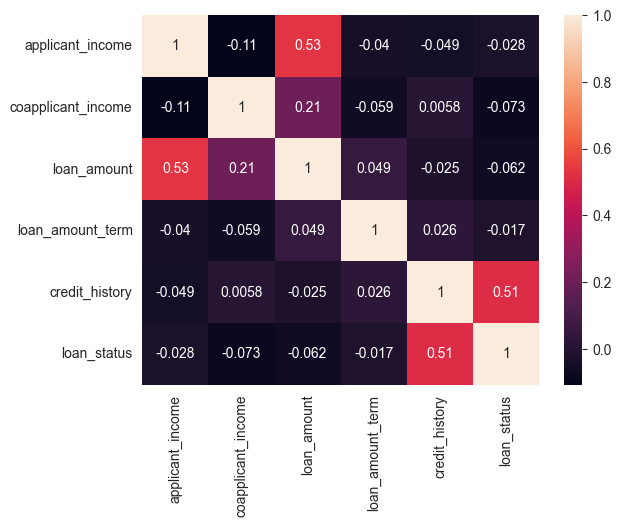

In [140]:
# Correlation between variables
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [141]:
# Target frequency
df['loan_status'].value_counts()

loan_status
1    389
0    164
Name: count, dtype: int64

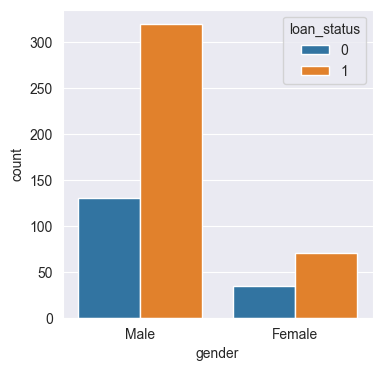

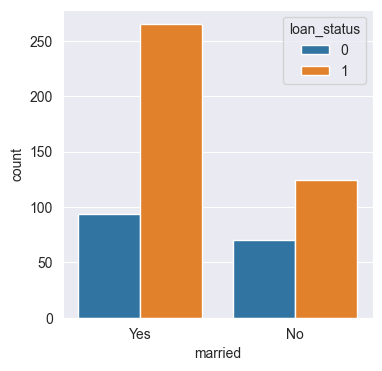

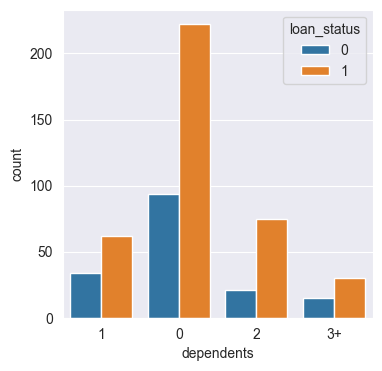

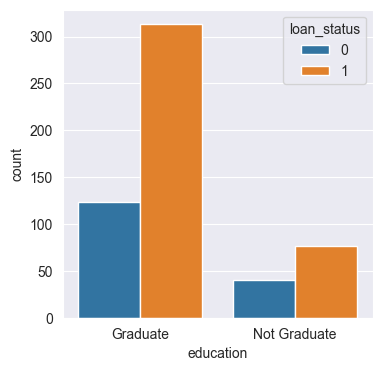

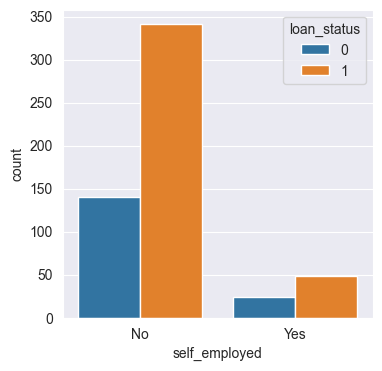

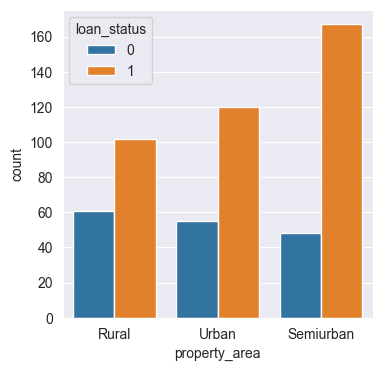

In [142]:
# Class frequency by loan_status

for col in df.columns[df.dtypes == "object"]:
    plt.figure(figsize=(4, 4))
    sns.countplot(data=df, x=col, hue="loan_status")
    plt.show()

# Modeling

In [143]:
# First model using loan_amount
X = df[['loan_amount', 'credit_history']]
y = df[['loan_status']]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Previewing the training set
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())


X_train:
     loan_amount  credit_history
25          35.0             1.0
336        130.0             1.0
42         144.0             1.0
353        135.0             1.0
465        113.0             1.0

y_train:
     loan_status
25             0
336            1
42             1
353            1
465            1


In [144]:
# Instantiate a logistic regression model
logreg = LogisticRegression()

# Fit to the training data
logreg.fit(X_train, y_train)

# Predict test set values
y_pred = logreg.predict(X_test)

# Check the model's first five predictions
print(y_pred[:5])

[1 1 1 0 1]


C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Classification Metrics

&nbsp;

## Accuracy

![accuracy_formula](accuracy_formula.png)

&nbsp;

## Confusion Matrix

**True Positive (TP)** = # Correctly predicted as positive

**True Negative (TN)** = # Correctly predicted as negative

**False Positive (FP)** = # Incorrectly predicted as positive (actually negative)

**False Negative (FN)** = # Incorrectly predicted as negative (actually positive)

&nbsp;

|        | **Predicted: Negative** | **Predicted: Positive** |
|--------|---------------------|---------------------|
|**Actual: Negative** | True Negative | False Positive |
|**Actual: Positive** | False Negative | True Positive |

&nbsp;

### Confusion Matrix Metrics

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

In [145]:
# Accuracy
accuracy = logreg.score(X_test, y_test)
print(accuracy)

0.8132530120481928


[[ 22  30]
 [  1 113]]


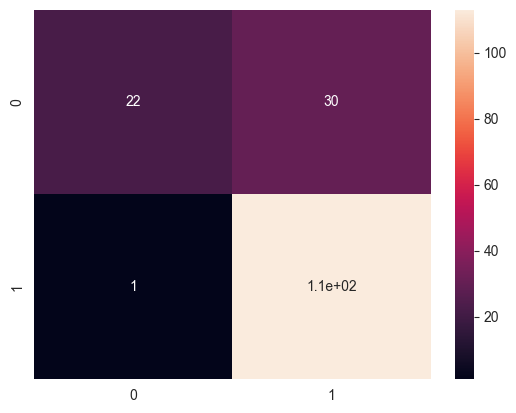

In [146]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(cm)
plt.show()

# Feature Engineering

In [147]:
# Convert categorical features to binary
df = pd.get_dummies(df)
# Previewing the new DataFrame
df.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
1,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
2,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
3,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
4,5417,4196.0,267.0,360.0,1.0,1,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True


In [148]:
# Resplit into features and targets
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())

X_train:
     applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
25               1442                 0.0         35.0             360.0   
336              4310                 0.0        130.0             360.0   
42               4000              2275.0        144.0             360.0   
353              3276               484.0        135.0             360.0   
465              2031              1632.0        113.0             480.0   

     credit_history  gender_Female  gender_Male  married_No  married_Yes  \
25              1.0          False         True        True        False   
336             1.0          False         True       False         True   
42              1.0           True        False        True        False   
353             1.0          False         True       False         True   
465             1.0           True        False       False         True   

     dependents_0  dependents_1  dependents_2  dependents_3+  \
25           

In [149]:
# Instantiate logistic regression model
logreg = LogisticRegression(max_iter=10000)
# Fit to the training data
logreg.fit(X_train, y_train)

# Predict test set values
y_pred = logreg.predict(X_test)
print(y_pred[:5])

[1 1 1 0 1]


In [150]:
# Accuracy
accuracy = logreg.score(X_test, y_test)
print(accuracy)

0.8132530120481928


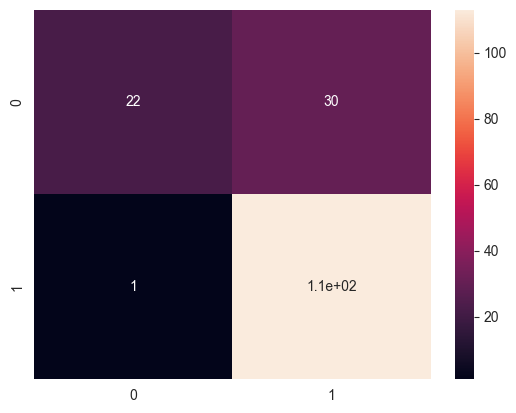

In [151]:
# Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [152]:
# Finding the importance of features
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                    Feature  Importance
4            credit_history    2.963493
18  property_area_Semiurban    0.537707
17      property_area_Rural    0.470325
10             dependents_1    0.442057
11             dependents_2    0.387144
16        self_employed_Yes    0.310663
15         self_employed_No    0.308274
8               married_Yes    0.290760
7                married_No    0.288371
5             gender_Female    0.086454
6               gender_Male    0.084065
19      property_area_Urban    0.064993
9              dependents_0    0.059057
14   education_Not Graduate    0.031406
13       education_Graduate    0.029017
2               loan_amount    0.002540
12            dependents_3+    0.001755
3          loan_amount_term    0.000797
1        coapplicant_income    0.000041
0          applicant_income    0.000011


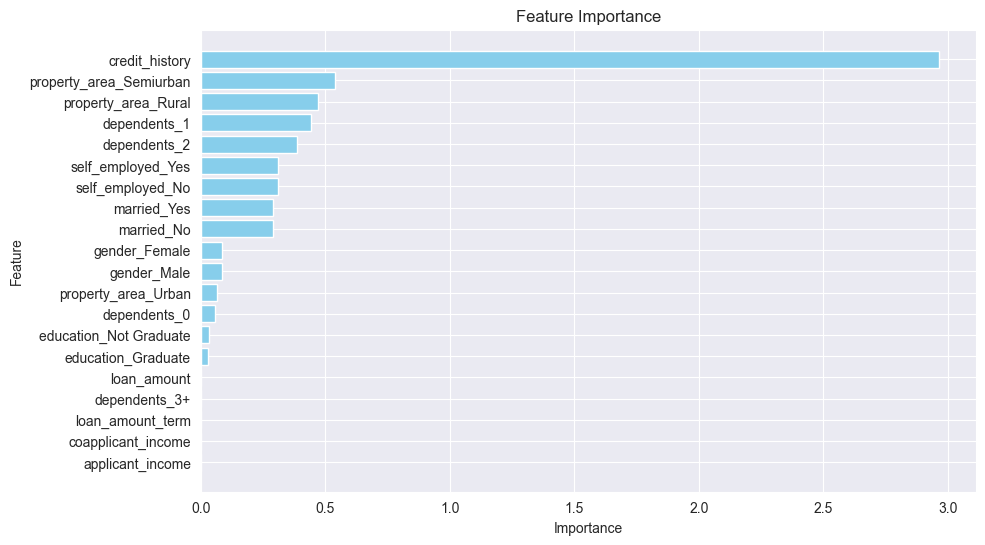

In [155]:
# Illustrate feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


# How might we improve model performance?

* Further [preprocessing](https://app.datacamp.com/learn/courses/preprocessing-for-machine-learning-in-python):
	- Log transformations for skewed distributions.
	- Scale feature values. 
	- Remove outliers e.g., high earners.
* Try a different model e.g., [Decision trees](https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python).
* Gather more data.
	- Train new models on incorrect predictions (may need more data and/or a holdout set).
* [Further feature engineering](https://app.datacamp.com/learn/courses/feature-engineering-for-machine-learning-in-python).
* [Hyperparameter tuning](https://app.datacamp.com/learn/courses/hyperparameter-tuning-in-python).